In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, pair_confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df2 = pd.read_csv("/content/drive/MyDrive/preeclampsia.csv")

In [4]:
df2.head()

,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,pp_13,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep
0,28,11,152,97,28.508125,71,133,14.683883,39.232347,2.764080,...,61.197945,257.668101,0,0,1,0,1,0,2,1
1,28,12,157,70,27.606337,87,127,14.510683,38.215125,2.439556,...,95.611529,269.812342,1,0,1,1,2,1,2,2
2,21,11,173,98,25.673333,76,128,12.592319,39.245587,4.147177,...,26.671472,197.074922,1,1,0,1,2,0,1,1
3,30,12,148,65,27.367781,82,122,14.128237,37.276060,2.118313,...,83.365411,244.343060,0,0,0,0,0,0,0,0
4,23,11,157,71,21.585036,76,139,13.089027,40.280974,1.186492,...,117.633252,239.124513,1,1,1,0,1,1,2,2


In [5]:
df2.columns

Index(['age', 'gest_age', 'height', 'weight', 'bmi', 'sysbp', 'diabp', 'hb',
       'pcv', 'tsh', 'platelet', 'creatinine', 'plgf:sflt', 'SEng', 'cysC',
       'pp_13', 'glycerides', 'htn', 'diabetes', 'fam_htn', 'sp_art',
       'occupation', 'diet', 'activity', 'sleep'],
      dtype='object')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         400 non-null    int64  
 1   gest_age    400 non-null    int64  
 2   height      400 non-null    int64  
 3   weight      400 non-null    int64  
 4   bmi         400 non-null    float64
 5   sysbp       400 non-null    int64  
 6   diabp       400 non-null    int64  
 7   hb          400 non-null    float64
 8   pcv         400 non-null    float64
 9   tsh         400 non-null    float64
 10  platelet    400 non-null    int64  
 11  creatinine  400 non-null    float64
 12  plgf:sflt   400 non-null    float64
 13  SEng        400 non-null    float64
 14  cysC        400 non-null    float64
 15  pp_13       400 non-null    float64
 16  glycerides  400 non-null    float64
 17  htn         400 non-null    int64  
 18  diabetes    400 non-null    int64  
 19  fam_htn     400 non-null    i

In [7]:
df2.isnull().sum()

,0
age,0
gest_age,0
height,0
weight,0
bmi,0
sysbp,0
diabp,0
hb,0
pcv,0
tsh,0


In [8]:
# Define a basic risk classification based on key preeclampsia risk factors
# We will classify patients as high-risk (1) or low-risk (0) based on simplified criteria:
# - High diastolic blood pressure (diabp > 90)
# - Abnormal PlGF:sFlt ratio (using a threshold, here assuming < 100 as abnormal)
# - History of hypertension (htn == 1)
# - BMI > 30

def classify_risk(row):
    risk_score = 0
    if row['diabp'] > 90:
        risk_score += 2
    if row['plgf:sflt'] < 80:
        risk_score += 3
    if row['htn'] == 1:
        risk_score += 2
    if row['bmi'] > 30:
        risk_score += 1

    if risk_score >= 5:
        return 1  # High risk
    else:
        return 0  # Low risk

# Apply the classification to the dataset
df2['preeclampsia_risk'] = df2.apply(classify_risk, axis=1)

# Preview the dataset with the new column
df2[['bmi', 'diabp', 'plgf:sflt', 'htn', 'preeclampsia_risk']].head()


,bmi,diabp,plgf:sflt,htn,preeclampsia_risk
0,28.508125,133,186.306646,0,0
1,27.606337,127,26.504275,1,1
2,25.673333,128,306.399498,1,0
3,27.367781,122,37.862287,0,1
4,21.585036,139,352.761050,1,0


In [10]:
df2.head()

,age,gest_age,height,weight,bmi,sysbp,diabp,hb,pcv,tsh,...,glycerides,htn,diabetes,fam_htn,sp_art,occupation,diet,activity,sleep,preeclampsia_risk
0,28,11,152,97,28.508125,71,133,14.683883,39.232347,2.764080,...,257.668101,0,0,1,0,1,0,2,1,0
1,28,12,157,70,27.606337,87,127,14.510683,38.215125,2.439556,...,269.812342,1,0,1,1,2,1,2,2,1
2,21,11,173,98,25.673333,76,128,12.592319,39.245587,4.147177,...,197.074922,1,1,0,1,2,0,1,1,0
3,30,12,148,65,27.367781,82,122,14.128237,37.276060,2.118313,...,244.343060,0,0,0,0,0,0,0,0,1
4,23,11,157,71,21.585036,76,139,13.089027,40.280974,1.186492,...,239.124513,1,1,1,0,1,1,2,2,0


In [11]:
df2['preeclampsia_risk'].value_counts()

,count
preeclampsia_risk,
0,276
1,124


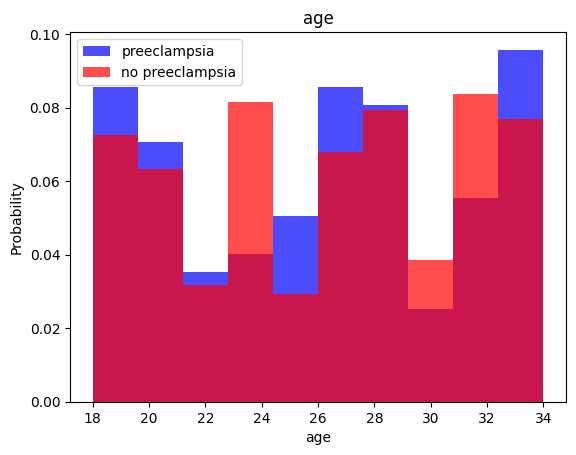

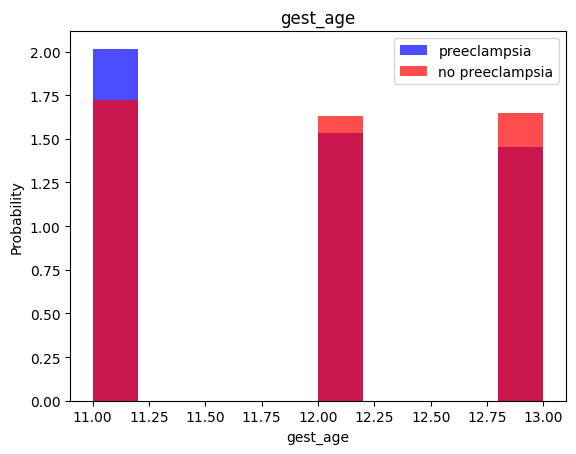

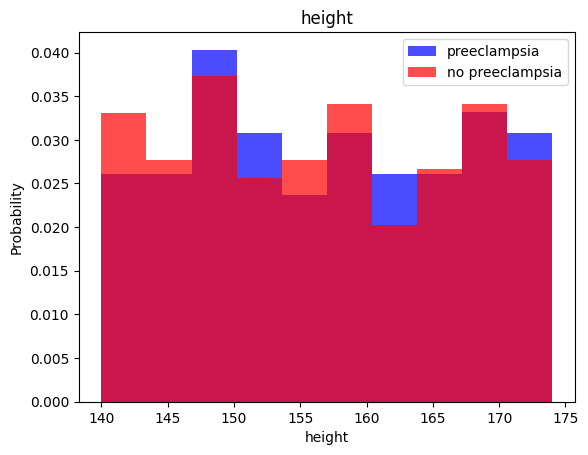

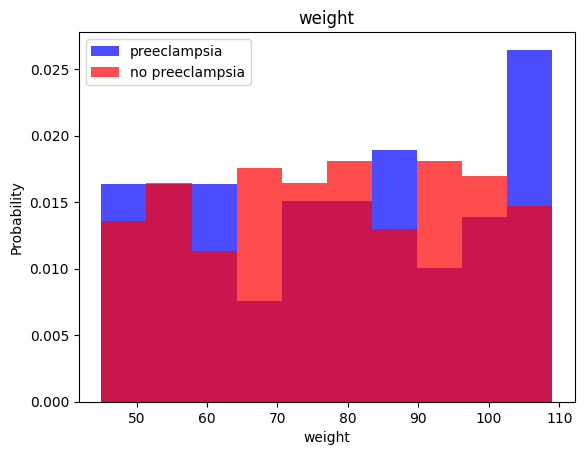

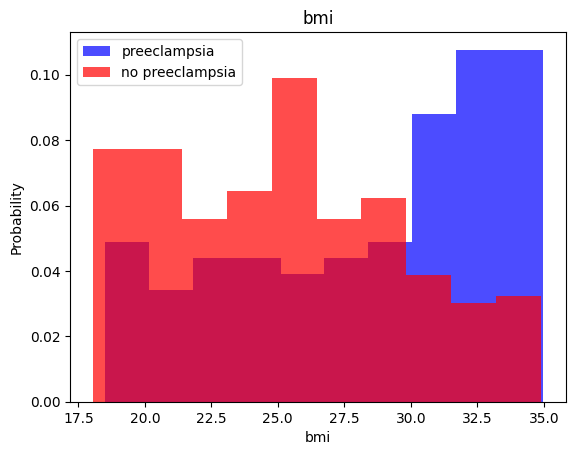

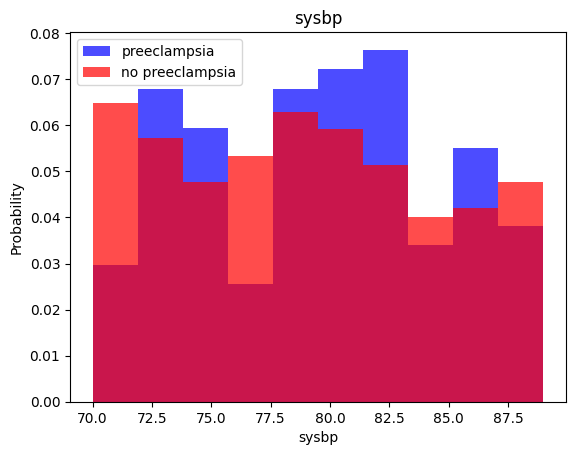

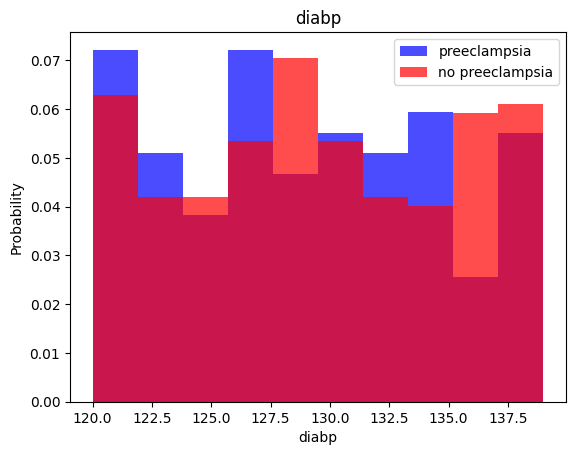

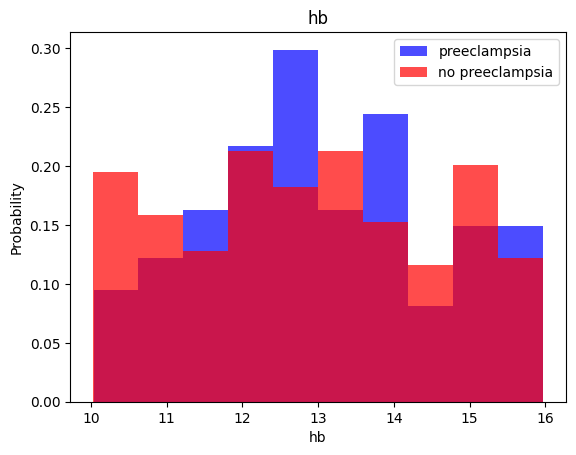

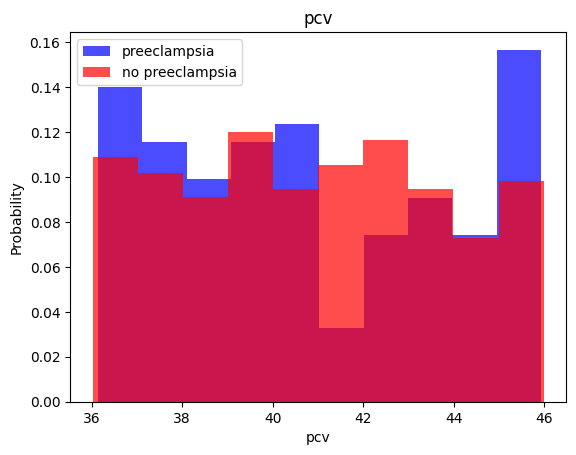

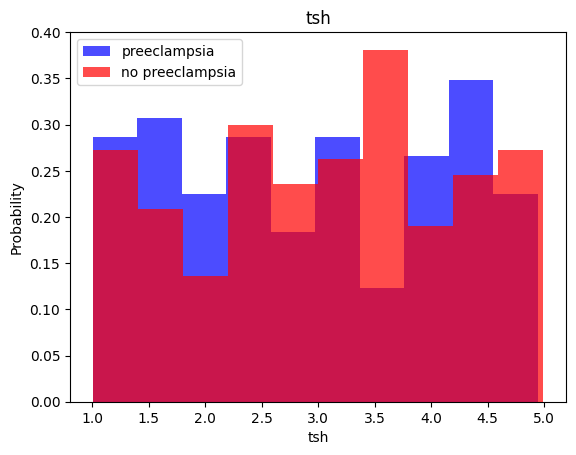

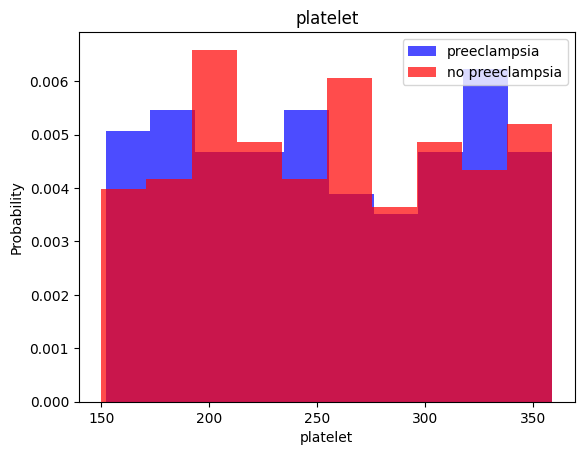

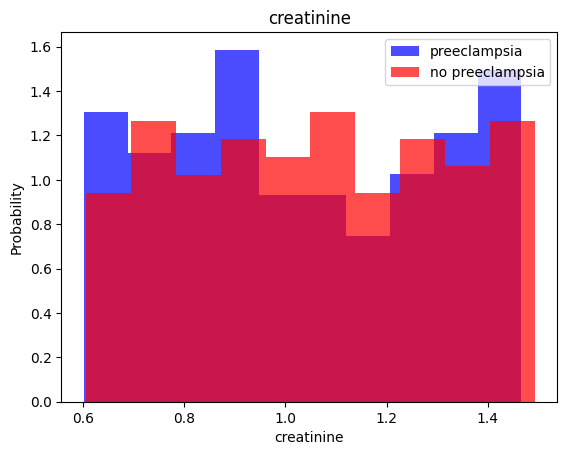

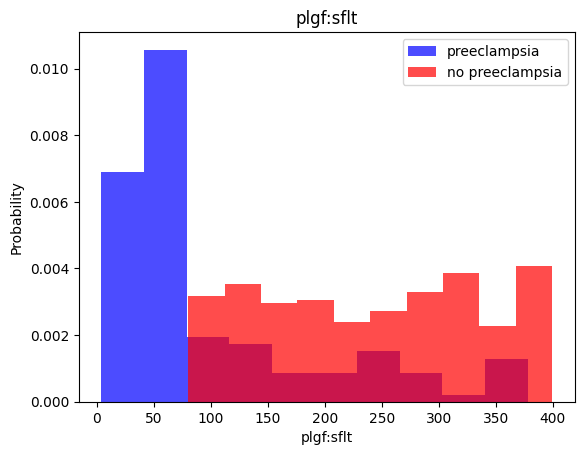

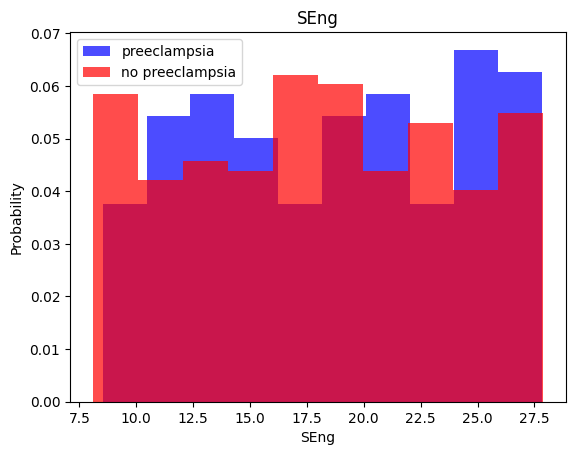

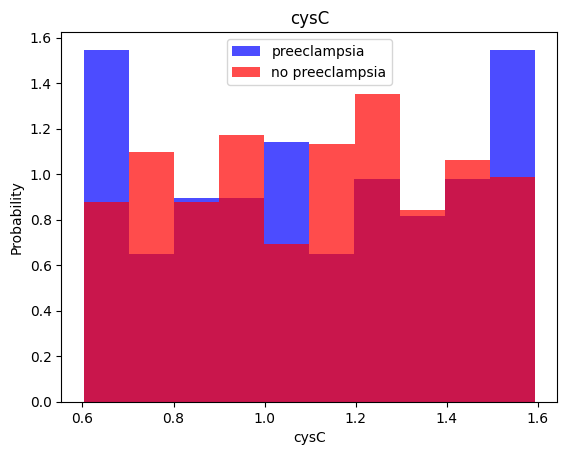

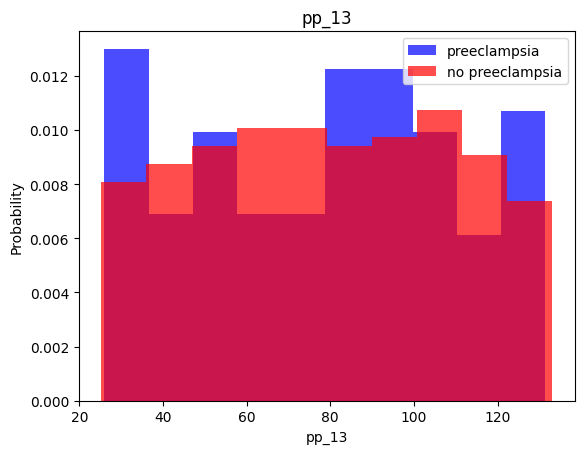

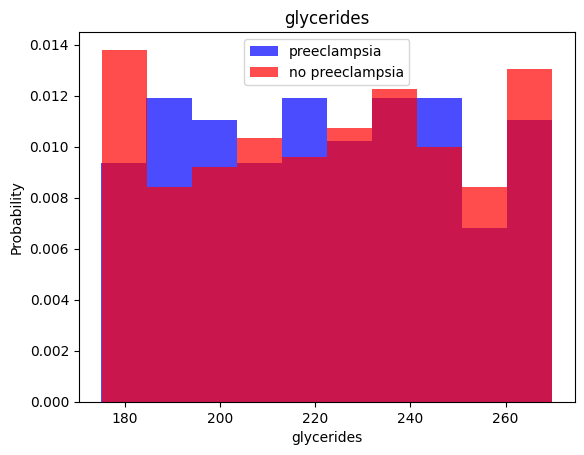

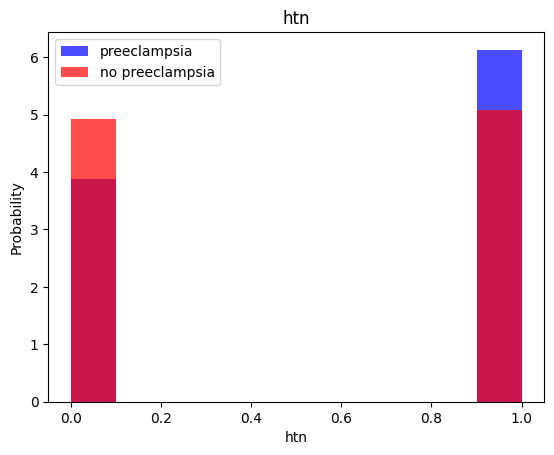

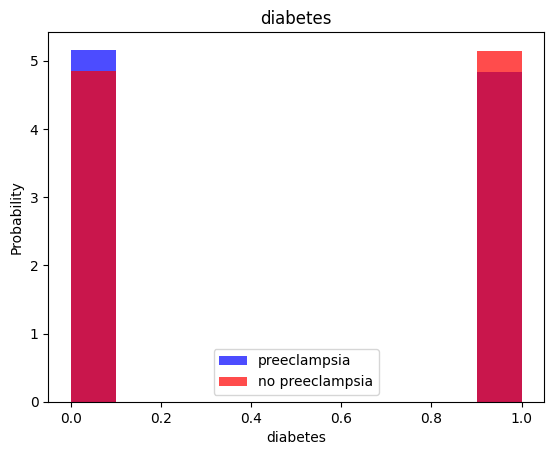

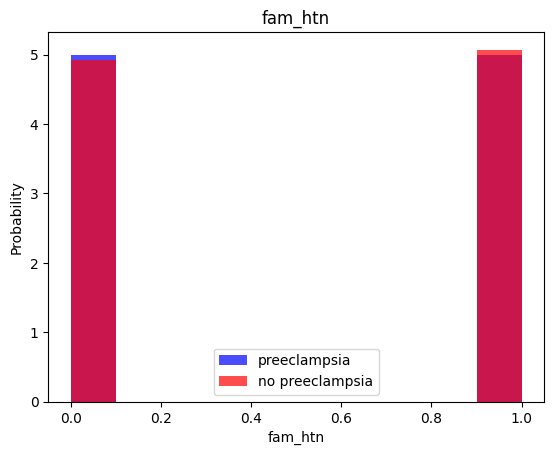

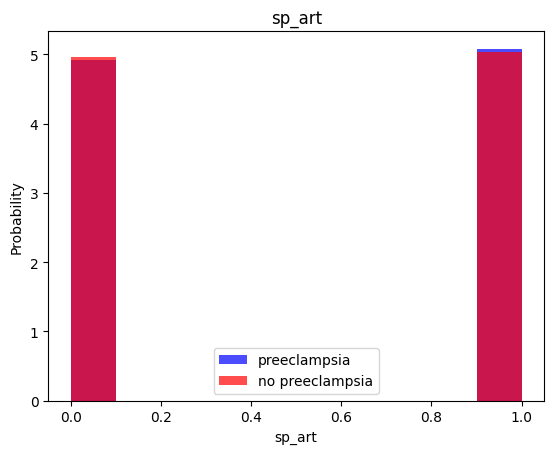

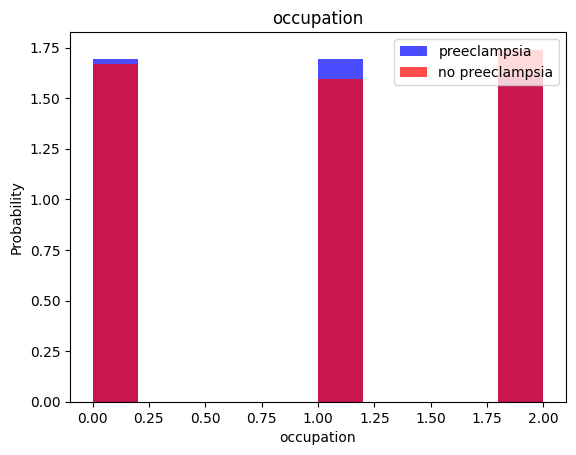

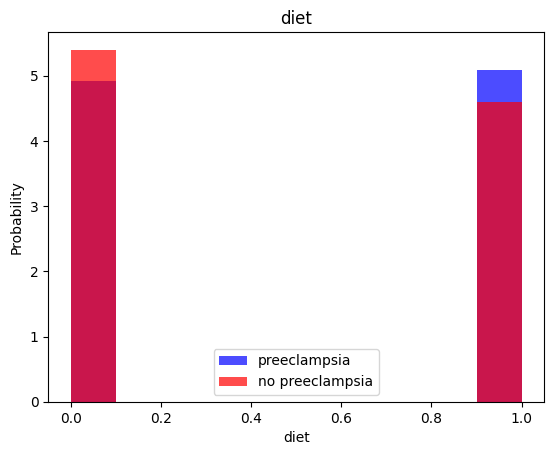

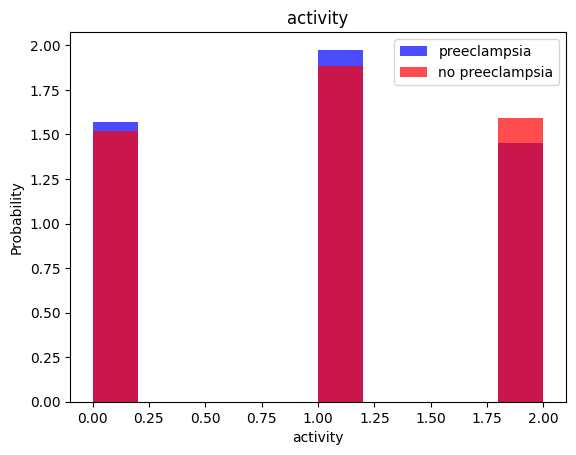

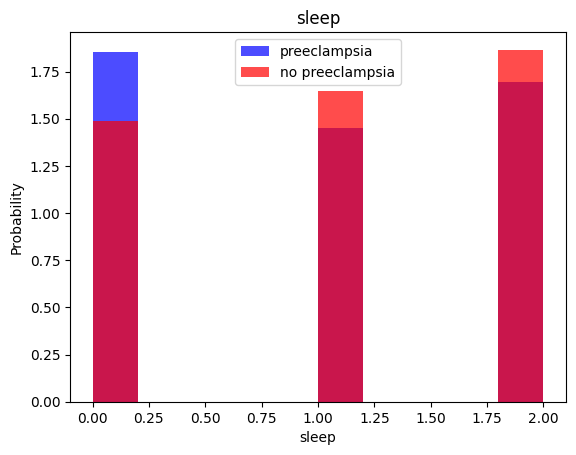

In [12]:
for label in df2.columns[:-1]:
  plt.hist(df2[df2["preeclampsia_risk"] == 1][label], color = "blue", label = "preeclampsia", alpha = 0.7, density = True)
  plt.hist(df2[df2["preeclampsia_risk"] == 0][label], color = "red", label = "no preeclampsia", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [13]:
X = df2.drop('preeclampsia_risk', axis=1)
y = df2['preeclampsia_risk']

In [14]:
X.columns

Index(['age', 'gest_age', 'height', 'weight', 'bmi', 'sysbp', 'diabp', 'hb',
       'pcv', 'tsh', 'platelet', 'creatinine', 'plgf:sflt', 'SEng', 'cysC',
       'pp_13', 'glycerides', 'htn', 'diabetes', 'fam_htn', 'sp_art',
       'occupation', 'diet', 'activity', 'sleep'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_train.value_counts()

,count
preeclampsia_risk,
0,219
1,101


In [17]:
smote = SMOTE(sampling_strategy='auto')

X_train, y_train = smote.fit_resample(X_train, y_train)


In [18]:
y_train.value_counts()

,count
preeclampsia_risk,
1,219
0,219


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[ 0.8297544 ,  0.18452465, -0.88454907, ..., -0.83921401,
        -1.22159477, -1.08768421],
       [ 1.24345096,  1.44736519,  0.06711371, ...,  1.19159116,
         1.46714146, -1.08768421],
       [-1.65242496,  1.44736519,  1.65321835, ..., -0.83921401,
         0.12277334,  1.33061876],
       ...,
       [ 1.03660268,  0.18452465,  1.0187765 , ..., -0.83921401,
        -1.22159477, -1.08768421],
       [ 0.62290612,  0.18452465, -1.30751031, ...,  1.19159116,
        -1.22159477, -1.08768421],
       [-1.65242496,  0.18452465, -1.20177   , ..., -0.83921401,
        -1.22159477, -1.08768421]])

In [21]:
# model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', enable_categorical = True)
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
print(preds)

[0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 1 0 1 0]


In [25]:
from sklearn.metrics import accuracy_score

# Computing the accuracy on the test data
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


In [26]:
from sklearn import metrics
print(" the accuracy of the XGBOOST is: ", metrics.accuracy_score(preds,y_test))

 the accuracy of the XGBOOST is:  0.9625


In [27]:
r_clf=RandomForestClassifier()
r_clf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=r_clf.predict(X_test)

In [29]:
from sklearn import metrics
print(" the accuracy of the random tree clasifier is: ", metrics.accuracy_score(y_pred,y_test))

 the accuracy of the random tree clasifier is:  0.95


In [30]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with the base models
voting_clf = VotingClassifier(estimators=[('rf', bst), ('gb', r_clf)], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_preds = voting_clf.predict(X_test)

print(" the accuracy of the random tree clasifier is: ", metrics.accuracy_score(y_preds,y_test))

 the accuracy of the random tree clasifier is:  0.9625


In [31]:
import joblib
joblib.dump(voting_clf, "safe_mom_model_1.pkl")

['safe_mom_model_1.pkl']